## Breast Cancer prediction

### A binary classification problem

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import sys
import os

#current_dir = os.getcwd()
#parent_dir = os.path.dirname(current_dir)
#sys.path.append(parent_dir)
parent_dir = '/content/drive/MyDrive/Documents/Projectes_Personals/BreastCancer'
sys.path.append(parent_dir + '/src/')

from utils import utils
from binary_classification import classification as bc
from binary_classification.models import Model

In [5]:
DATA_PATH = parent_dir + "/data/clean_breast_cancer.csv"
OUTPUT_PATH = parent_dir + "/data/outputs"
TARGET = 'diagnosis'
PREDICTORS = ['radius_mean', 'perimeter_mean']

In [6]:
df = utils.load_data(DATA_PATH)
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,0.521037,0.022658,0.545989,0.363733,0.593753,0.792037,0.703140,0.731113,0.686364,...,0.620776,0.141525,0.668310,0.450698,0.601136,0.619292,0.568610,0.912027,0.598462,0.418864
1,1,0.643144,0.272574,0.615783,0.501591,0.289880,0.181768,0.203608,0.348757,0.379798,...,0.606901,0.303571,0.539818,0.435214,0.347553,0.154563,0.192971,0.639175,0.233590,0.222878
2,1,0.601496,0.390260,0.595743,0.449417,0.514309,0.431017,0.462512,0.635686,0.509596,...,0.556386,0.360075,0.508442,0.374508,0.483590,0.385375,0.359744,0.835052,0.403706,0.213433
3,1,0.210090,0.360839,0.233501,0.102906,0.811321,0.811361,0.565604,0.522863,0.776263,...,0.248310,0.385928,0.241347,0.094008,0.915472,0.814012,0.548642,0.884880,1.000000,0.773711
4,1,0.629893,0.156578,0.630986,0.489290,0.430351,0.347893,0.463918,0.518390,0.378283,...,0.519744,0.123934,0.506948,0.341575,0.437364,0.172415,0.319489,0.558419,0.157500,0.142595


In [7]:
data = utils.split_train_test(df, PREDICTORS, TARGET)

In [ ]:
data.keys()

dict_keys(['X_train', 'X_test', 'y_train', 'y_test'])

## Logistic Regression

In [ ]:
model_obj = Model('LogisticRegression', optimization=False)

{'penalty': 'l2', 'c_reg': 1.0, 'solver': 'lbfgs', 'max_iter': 100}


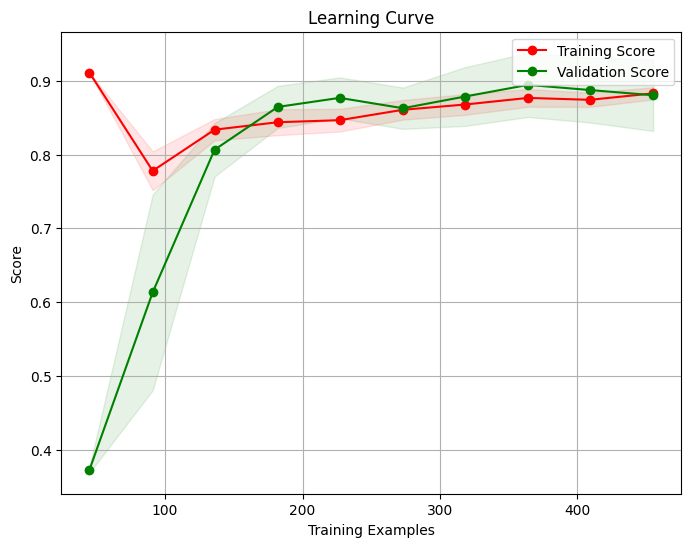

In [ ]:
print(model_obj.hyperparameters)
bc.plot_learning_curve(model_obj, df[PREDICTORS], df[TARGET], cv=5)

Overfiting.

For model LogisticRegression with {'penalty': 'l2', 'c_reg': 1.0, 'solver': 'lbfgs', 'max_iter': 100}:

Results for train set:

   accuracy  precision  recall   f1  auc_roc
0    0.8703     0.9365  0.6982  0.8   0.8351

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0    0.9298        1.0   0.814  0.8974    0.907


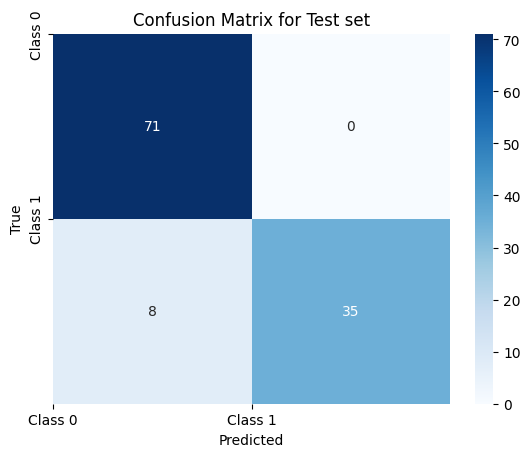

In [ ]:
bc.train_and_evaluate_model(model_obj, data)

In [ ]:
# Hyperparameter_optimization
model_obj = Model('LogisticRegression', optimization=True)
print(f'Hyperparameters to optimize : {model_obj.hyperparams_to_optimize}')
best_params = bc.hyperparameter_optimization(model_obj.model,
                                             model_obj.hyperparams_to_optimize,
                                             df[PREDICTORS],
                                             df[TARGET],
                                             cv=8)

Hyperparameters to optimize : {'penalty': ['l2'], 'C': [1000, 10000, 20000, 30000], 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'], 'max_iter': [5000, 6000, 7000]}
Best hyperparameters found: {'C': 20000, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'newton-cg'}
Best score: 0.9015


{'penalty': 'l2', 'c_reg': 20000, 'solver': 'newton-cg', 'max_iter': 5000}


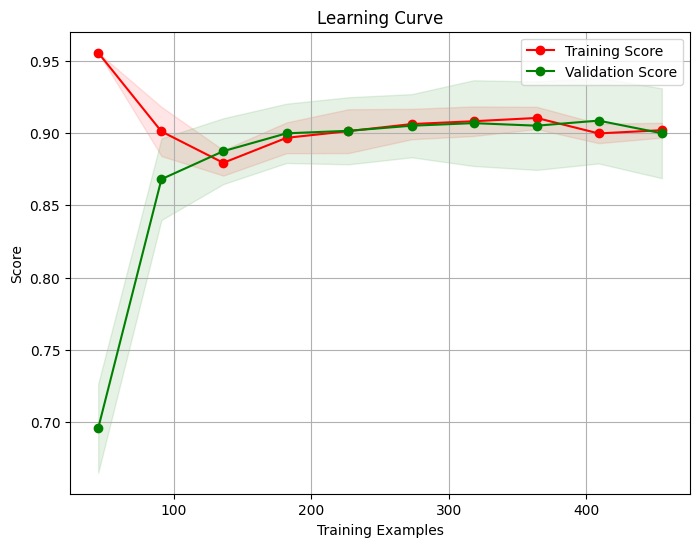

In [ ]:
# Study with best params.
model_obj = Model('LogisticRegression', kwargs=best_params)
print(model_obj.hyperparameters)
bc.plot_learning_curve(model_obj, df[PREDICTORS], df[TARGET], cv=None)

For model LogisticRegression with {'penalty': 'l2', 'c_reg': 20000, 'solver': 'newton-cg', 'max_iter': 5000}:

Results for train set:

   accuracy  precision  recall      f1  auc_roc
0    0.8967     0.8961  0.8166  0.8545   0.8803

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0    0.9298     0.9487  0.8605  0.9024   0.9161


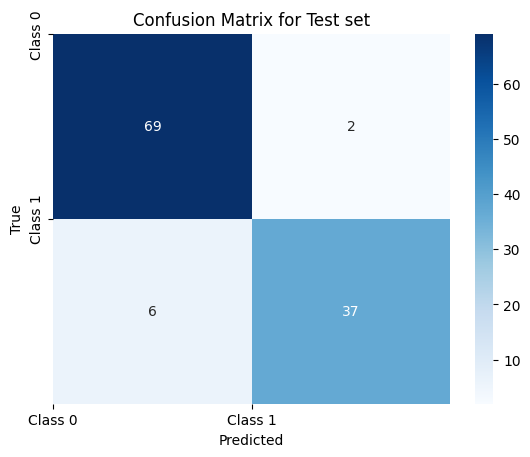

In [ ]:
bc.train_and_evaluate_model(model_obj, data, save_outputs=True, output_dir=OUTPUT_PATH)

### DecisionTree

In [ ]:
model_obj = Model('DecisionTree', optimization=False)

{'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


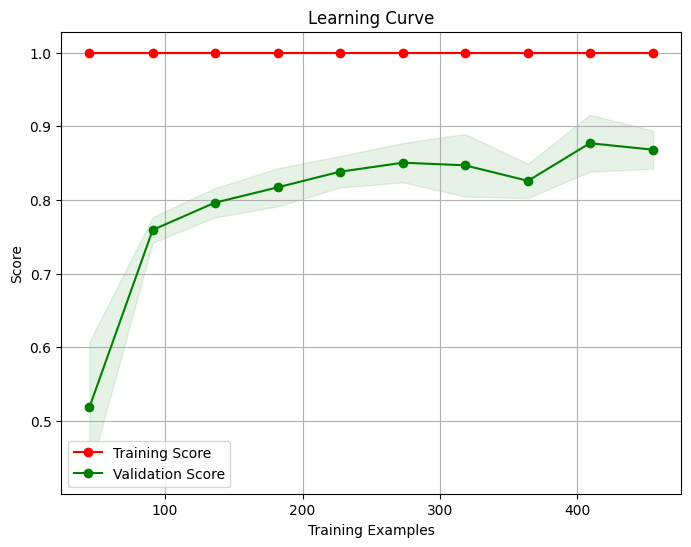

In [ ]:
print(model_obj.hyperparameters)
bc.plot_learning_curve(model_obj, df[PREDICTORS], df[TARGET], cv=5)

For model DecisionTree with {'criterion': 'gini', 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}:

Results for train set:

   accuracy  precision  recall   f1  auc_roc
0       1.0        1.0     1.0  1.0      1.0

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0     0.886     0.8571  0.8372  0.8471   0.8764


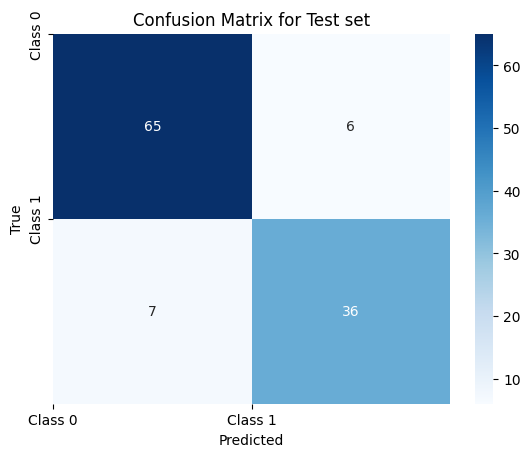

In [ ]:
bc.train_and_evaluate_model(model_obj, data)

In [ ]:
# Hyperparameter_optimization
model_obj = Model('DecisionTree', optimization=True)
print(f'Hyperparameters to optimize : {model_obj.hyperparams_to_optimize}')
best_params = bc.hyperparameter_optimization(model_obj.model,
                                             model_obj.hyperparams_to_optimize,
                                             df[PREDICTORS],
                                             df[TARGET],
                                             cv=8)

Hyperparameters to optimize : {'criterion': ['gini', 'entropy'], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', 0.5]}
Best hyperparameters found: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best score: 0.891


{'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.5}


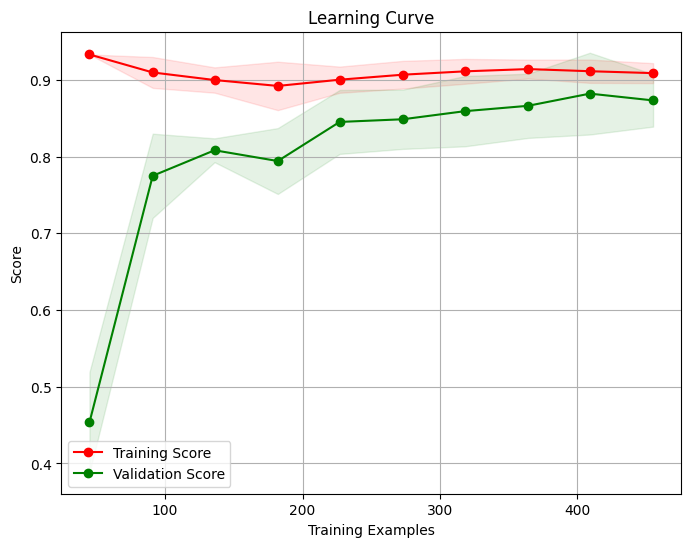

In [ ]:
# Study with best params.
model_obj = Model('DecisionTree', kwargs=best_params)
print(model_obj.hyperparameters)
bc.plot_learning_curve(model_obj, df[PREDICTORS], df[TARGET], cv=None)

For model DecisionTree with {'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 0.5}:

Results for train set:

   accuracy  precision  recall      f1  auc_roc
0    0.9077     0.9568   0.787  0.8636    0.883

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0    0.9474     0.9512   0.907  0.9286   0.9394


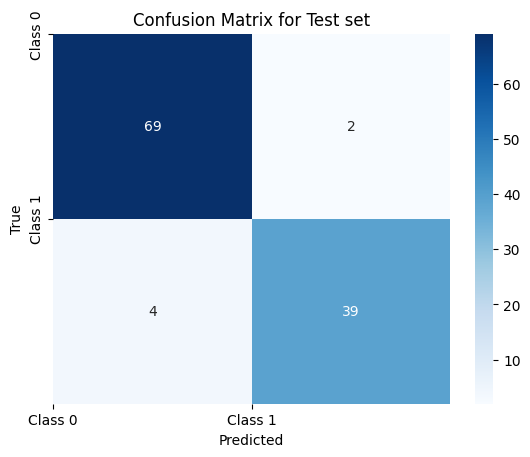

In [ ]:
bc.train_and_evaluate_model(model_obj, data, save_outputs=True, output_dir=OUTPUT_PATH)

### Random Forest:

In [ ]:
model_obj = Model('RandomForest', optimization=False)

{'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


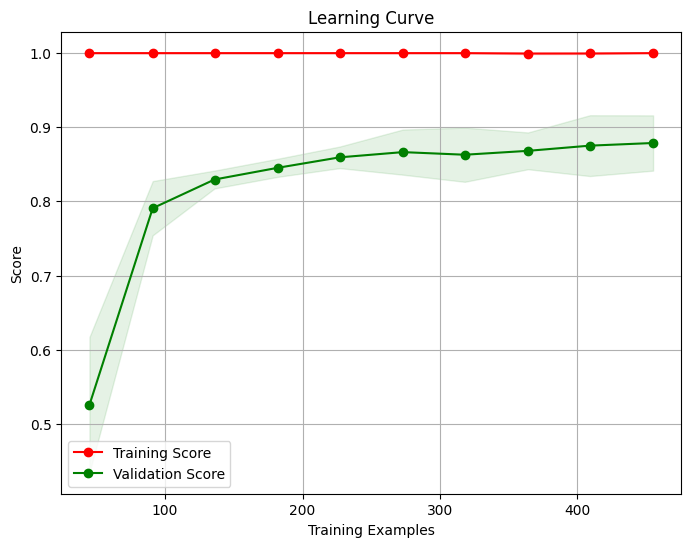

In [ ]:
print(model_obj.hyperparameters)
bc.plot_learning_curve(model_obj, df[PREDICTORS], df[TARGET], cv=5)

For model RandomForest with {'n_estimators': 100, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt'}:

Results for train set:

   accuracy  precision  recall   f1  auc_roc
0       1.0        1.0     1.0  1.0      1.0

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0    0.9211      0.925  0.8605  0.8916   0.9091


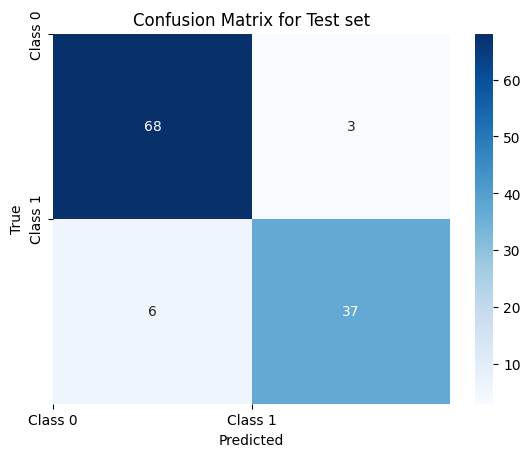

In [ ]:
bc.train_and_evaluate_model(model_obj, data)

In [ ]:
# Hyperparameter_optimization
model_obj = Model('RandomForest', optimization=True)
print(f'Hyperparameters to optimize : {model_obj.hyperparams_to_optimize}')
best_params = bc.hyperparameter_optimization(model_obj.model,
                                             model_obj.hyperparams_to_optimize,
                                             df[PREDICTORS],
                                             df[TARGET],
                                             cv=2)

Hyperparameters to optimize : {'n_estimators': [10, 20, 50, 100], 'max_depth': [None, 5, 10, 20], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'max_features': ['sqrt', 'log2', 0.5]}
Best hyperparameters found: {'max_depth': 10, 'max_features': 0.5, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}
Best score: 0.8841


{'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5}


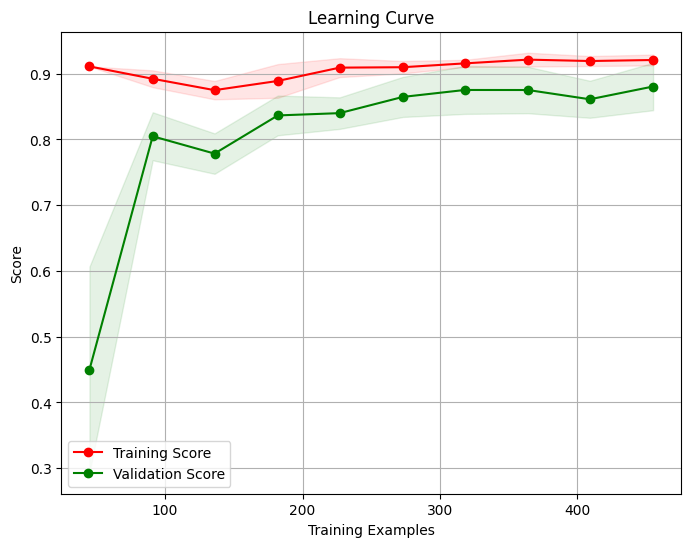

In [ ]:
# Study with best params.
model_obj = Model('RandomForest', kwargs=best_params)
print(model_obj.hyperparameters)
bc.plot_learning_curve(model_obj, df[PREDICTORS], df[TARGET], cv=None)

For model RandomForest with {'n_estimators': 10, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 0.5}:

Results for train set:

   accuracy  precision  recall      f1  auc_roc
0    0.9253      0.953  0.8402  0.8931   0.9079

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0    0.9298     0.9268  0.8837  0.9048   0.9207


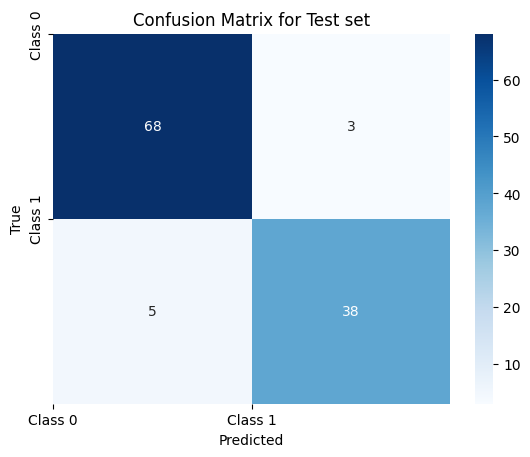

In [ ]:
bc.train_and_evaluate_model(model_obj, data, save_outputs=True, output_dir=OUTPUT_PATH)

### SVM

In [ ]:
model_obj = Model('SVM', optimization=False)

{'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'class_weight': None}


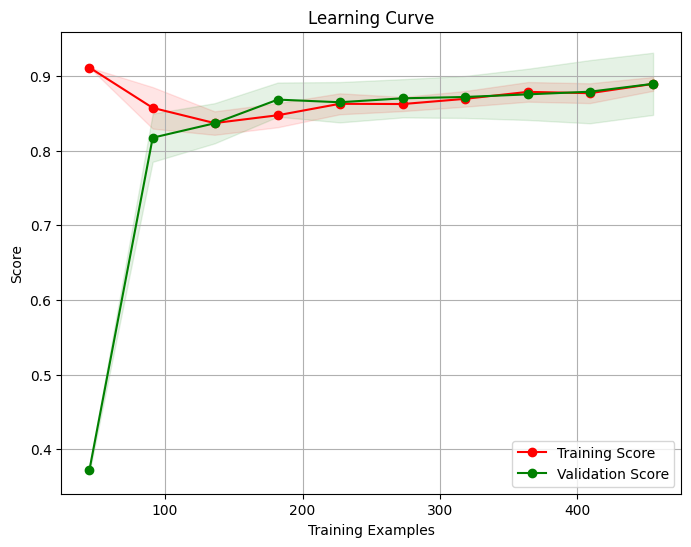

In [ ]:
print(model_obj.hyperparameters)
bc.plot_learning_curve(model_obj, df[PREDICTORS], df[TARGET], cv=5)

For model SVM with {'C': 1.0, 'kernel': 'rbf', 'gamma': 'scale', 'degree': 3, 'class_weight': None}:

Results for train set:

   accuracy  precision  recall      f1  auc_roc
0    0.8835     0.9328  0.7396  0.8251   0.8541

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0    0.9211     0.9722   0.814  0.8861   0.8999


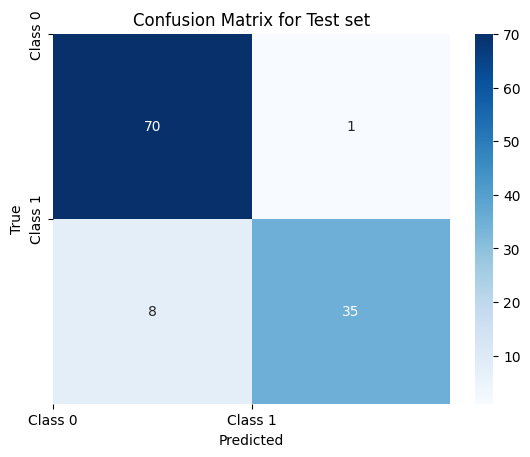

In [ ]:
bc.train_and_evaluate_model(model_obj, data)

In [ ]:
# Hyperparameter_optimization
model_obj = Model('SVM', optimization=True)
print(f'Hyperparameters to optimize : {model_obj.hyperparams_to_optimize}')
best_params = bc.hyperparameter_optimization(model_obj.model,
                                             model_obj.hyperparams_to_optimize,
                                             df[PREDICTORS],
                                             df[TARGET],
                                             cv=5)

Hyperparameters to optimize : {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf', 'poly'], 'gamma': ['scale', 'auto', 0.1, 1], 'degree': [2, 3, 4], 'class_weight': [None, 'balanced']}
Best hyperparameters found: {'C': 10, 'class_weight': 'balanced', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly'}
Best score: 0.8946


{'C': 10, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'class_weight': 'balanced'}


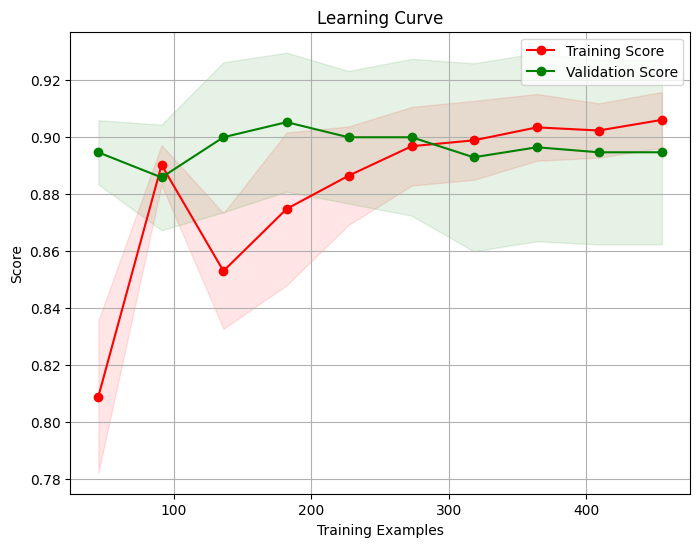

In [ ]:
# Study with best params.
model_obj = Model('SVM', kwargs=best_params)
print(model_obj.hyperparameters)
bc.plot_learning_curve(model_obj, df[PREDICTORS], df[TARGET], cv=5)

For model SVM with {'C': 10, 'kernel': 'poly', 'gamma': 'scale', 'degree': 3, 'class_weight': 'balanced'}:

Results for train set:

   accuracy  precision  recall      f1  auc_roc
0    0.8945     0.8712  0.8402  0.8554   0.8834

Results for test set:

   accuracy  precision  recall      f1  auc_roc
0    0.9474     0.9302  0.9302  0.9302    0.944


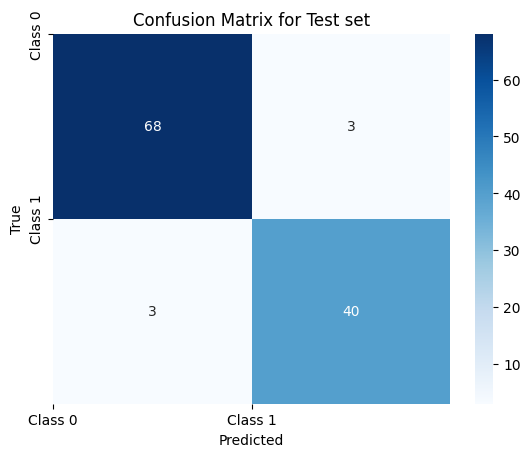

In [ ]:
bc.train_and_evaluate_model(model_obj, data, save_outputs=True, output_dir=OUTPUT_PATH)

### Naive Bayes

In [ ]:
model_obj = Model('NaiveBayes', optimization=False) # No optimization for this model.

{'priors': None}


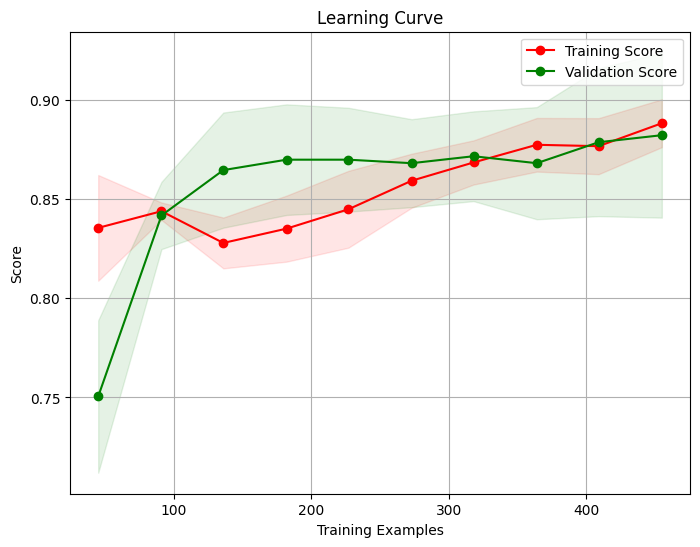

In [ ]:
print(model_obj.hyperparameters)
bc.plot_learning_curve(model_obj, df[PREDICTORS], df[TARGET], cv=5)

For model NaiveBayes with {'priors': None}:

Results for train set:

   accuracy  precision  recall      f1  auc_roc
0    0.8791     0.8958  0.7633  0.8243   0.8554

Results for test set:

   accuracy  precision  recall   f1  auc_roc
0    0.9298      0.973  0.8372  0.9   0.9116


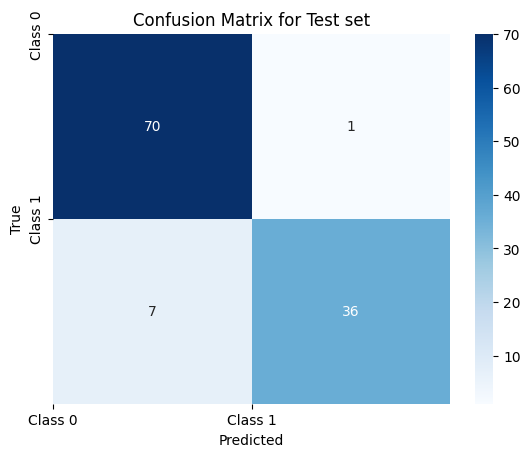

In [ ]:
bc.train_and_evaluate_model(model_obj, data, save_outputs=True, output_dir=OUTPUT_PATH)

### Ensemble Methods: